In [56]:
import os
import torch
import pandas as pd
import seaborn as sns
import config
import pyreadr
import numpy as np
import pickle
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from Model import TestNet


In [57]:
cfg = config.config_dict

In [58]:
def plot_confusion_matrix(confusion_matrix, class_names, figsize = (100,70), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.

    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix.
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (100,70).
    fontsize: int
        Font size for axes labels. Defaults to 14.
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt = "d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [59]:
def load_probs (outer_fold):
    cfg = config.config_dict
    PICKLES_DIR = cfg['PICKLES_DIR']
    probs_pickle_filename = f'{outer_fold}_probs.pickle'
    labels_pickle_filename = f'{outer_fold}_labels.pickle'
    probs_pickle_filepath = os.path.join(PICKLES_DIR, probs_pickle_filename)
    labels_pickle_filepath = os.path.join(PICKLES_DIR, labels_pickle_filename)
    
    with open(probs_pickle_filepath, 'rb') as handle:
        probs = pickle.load(handle)
    with open(labels_pickle_filepath, 'rb') as handle:
        labels = pickle.load(handle)
    return probs, labels

In [60]:
df_labels = pyreadr.read_r(cfg['R_LABELS_PATH'])['y']
all_labels = list(df_labels['y'])
# print(all_labels)
label_codes = {label:index for index, label in enumerate(np.unique(all_labels))}
print(label_codes)

{'A IDH': 0, 'A IDH, HG': 1, 'ANA PA': 2, 'ATRT, MYC': 3, 'ATRT, SHH': 4, 'ATRT, TYR': 5, 'CHGL': 6, 'CHORDM': 7, 'CN': 8, 'CNS NB, FOXR2': 9, 'CONTR, ADENOPIT': 10, 'CONTR, CEBM': 11, 'CONTR, HEMI': 12, 'CONTR, HYPTHAL': 13, 'CONTR, INFLAM': 14, 'CONTR, PINEAL': 15, 'CONTR, PONS': 16, 'CONTR, REACT': 17, 'CONTR, WM': 18, 'CPH, ADM': 19, 'CPH, PAP': 20, 'DLGNT': 21, 'DMG, K27': 22, 'EFT, CIC': 23, 'ENB, A': 24, 'ENB, B': 25, 'EPN, MPE': 26, 'EPN, PF A': 27, 'EPN, PF B': 28, 'EPN, RELA': 29, 'EPN, SPINE': 30, 'EPN, YAP': 31, 'ETMR': 32, 'EWS': 33, 'GBM, G34': 34, 'GBM, MES': 35, 'GBM, MID': 36, 'GBM, MYCN': 37, 'GBM, RTK I': 38, 'GBM, RTK II': 39, 'GBM, RTK III': 40, 'HGNET, BCOR': 41, 'HGNET, MN1': 42, 'HMB': 43, 'IHG': 44, 'LGG, DIG/DIA': 45, 'LGG, DNT': 46, 'LGG, GG': 47, 'LGG, MYB': 48, 'LGG, PA MID': 49, 'LGG, PA PF': 50, 'LGG, PA/GG ST': 51, 'LGG, RGNT': 52, 'LGG, SEGA': 53, 'LIPN': 54, 'LYMPHO': 55, 'MB, G3': 56, 'MB, G4': 57, 'MB, SHH CHL AD': 58, 'MB, SHH INF': 59, 'MB, WNT': 6

In [61]:
label_codes.keys(), label_codes.values()

(dict_keys(['A IDH', 'A IDH, HG', 'ANA PA', 'ATRT, MYC', 'ATRT, SHH', 'ATRT, TYR', 'CHGL', 'CHORDM', 'CN', 'CNS NB, FOXR2', 'CONTR, ADENOPIT', 'CONTR, CEBM', 'CONTR, HEMI', 'CONTR, HYPTHAL', 'CONTR, INFLAM', 'CONTR, PINEAL', 'CONTR, PONS', 'CONTR, REACT', 'CONTR, WM', 'CPH, ADM', 'CPH, PAP', 'DLGNT', 'DMG, K27', 'EFT, CIC', 'ENB, A', 'ENB, B', 'EPN, MPE', 'EPN, PF A', 'EPN, PF B', 'EPN, RELA', 'EPN, SPINE', 'EPN, YAP', 'ETMR', 'EWS', 'GBM, G34', 'GBM, MES', 'GBM, MID', 'GBM, MYCN', 'GBM, RTK I', 'GBM, RTK II', 'GBM, RTK III', 'HGNET, BCOR', 'HGNET, MN1', 'HMB', 'IHG', 'LGG, DIG/DIA', 'LGG, DNT', 'LGG, GG', 'LGG, MYB', 'LGG, PA MID', 'LGG, PA PF', 'LGG, PA/GG ST', 'LGG, RGNT', 'LGG, SEGA', 'LIPN', 'LYMPHO', 'MB, G3', 'MB, G4', 'MB, SHH CHL AD', 'MB, SHH INF', 'MB, WNT', 'MELAN', 'MELCYT', 'MNG', 'O IDH', 'PGG, nC', 'PIN T,  PB A', 'PIN T,  PB B', 'PIN T, PPT', 'PITAD, ACTH', 'PITAD, FSH LH', 'PITAD, PRL', 'PITAD, STH DNS A', 'PITAD, STH DNS B', 'PITAD, STH SPA', 'PITAD, TSH', 'PITUI', '

In [62]:
probs, labels = load_probs('2.0')
preds_int = np.argmax(probs, axis = 1)
print(preds_int, type(preds_int), len(preds_int), len(probs))
labels_int = np.array([label_codes[label] for label in labels])
print(labels_int, type(labels_int), len(labels_int), len(labels))
cfs = confusion_matrix(labels_int, preds_int)
cfs, cfs.shape

[22 22 34 ... 34  2  2] <class 'numpy.ndarray'> 2221 2221
[22 22 34 ... 37  2  2] <class 'numpy.ndarray'> 2221 2221


(array([[59,  2,  0, ...,  0,  0,  0],
        [ 2, 34,  0, ...,  0,  0,  0],
        [ 0,  0, 17, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ..., 28,  0,  0],
        [ 0,  0,  0, ...,  0,  7,  0],
        [ 0,  0,  0, ...,  0,  0, 15]]),
 (91, 91))

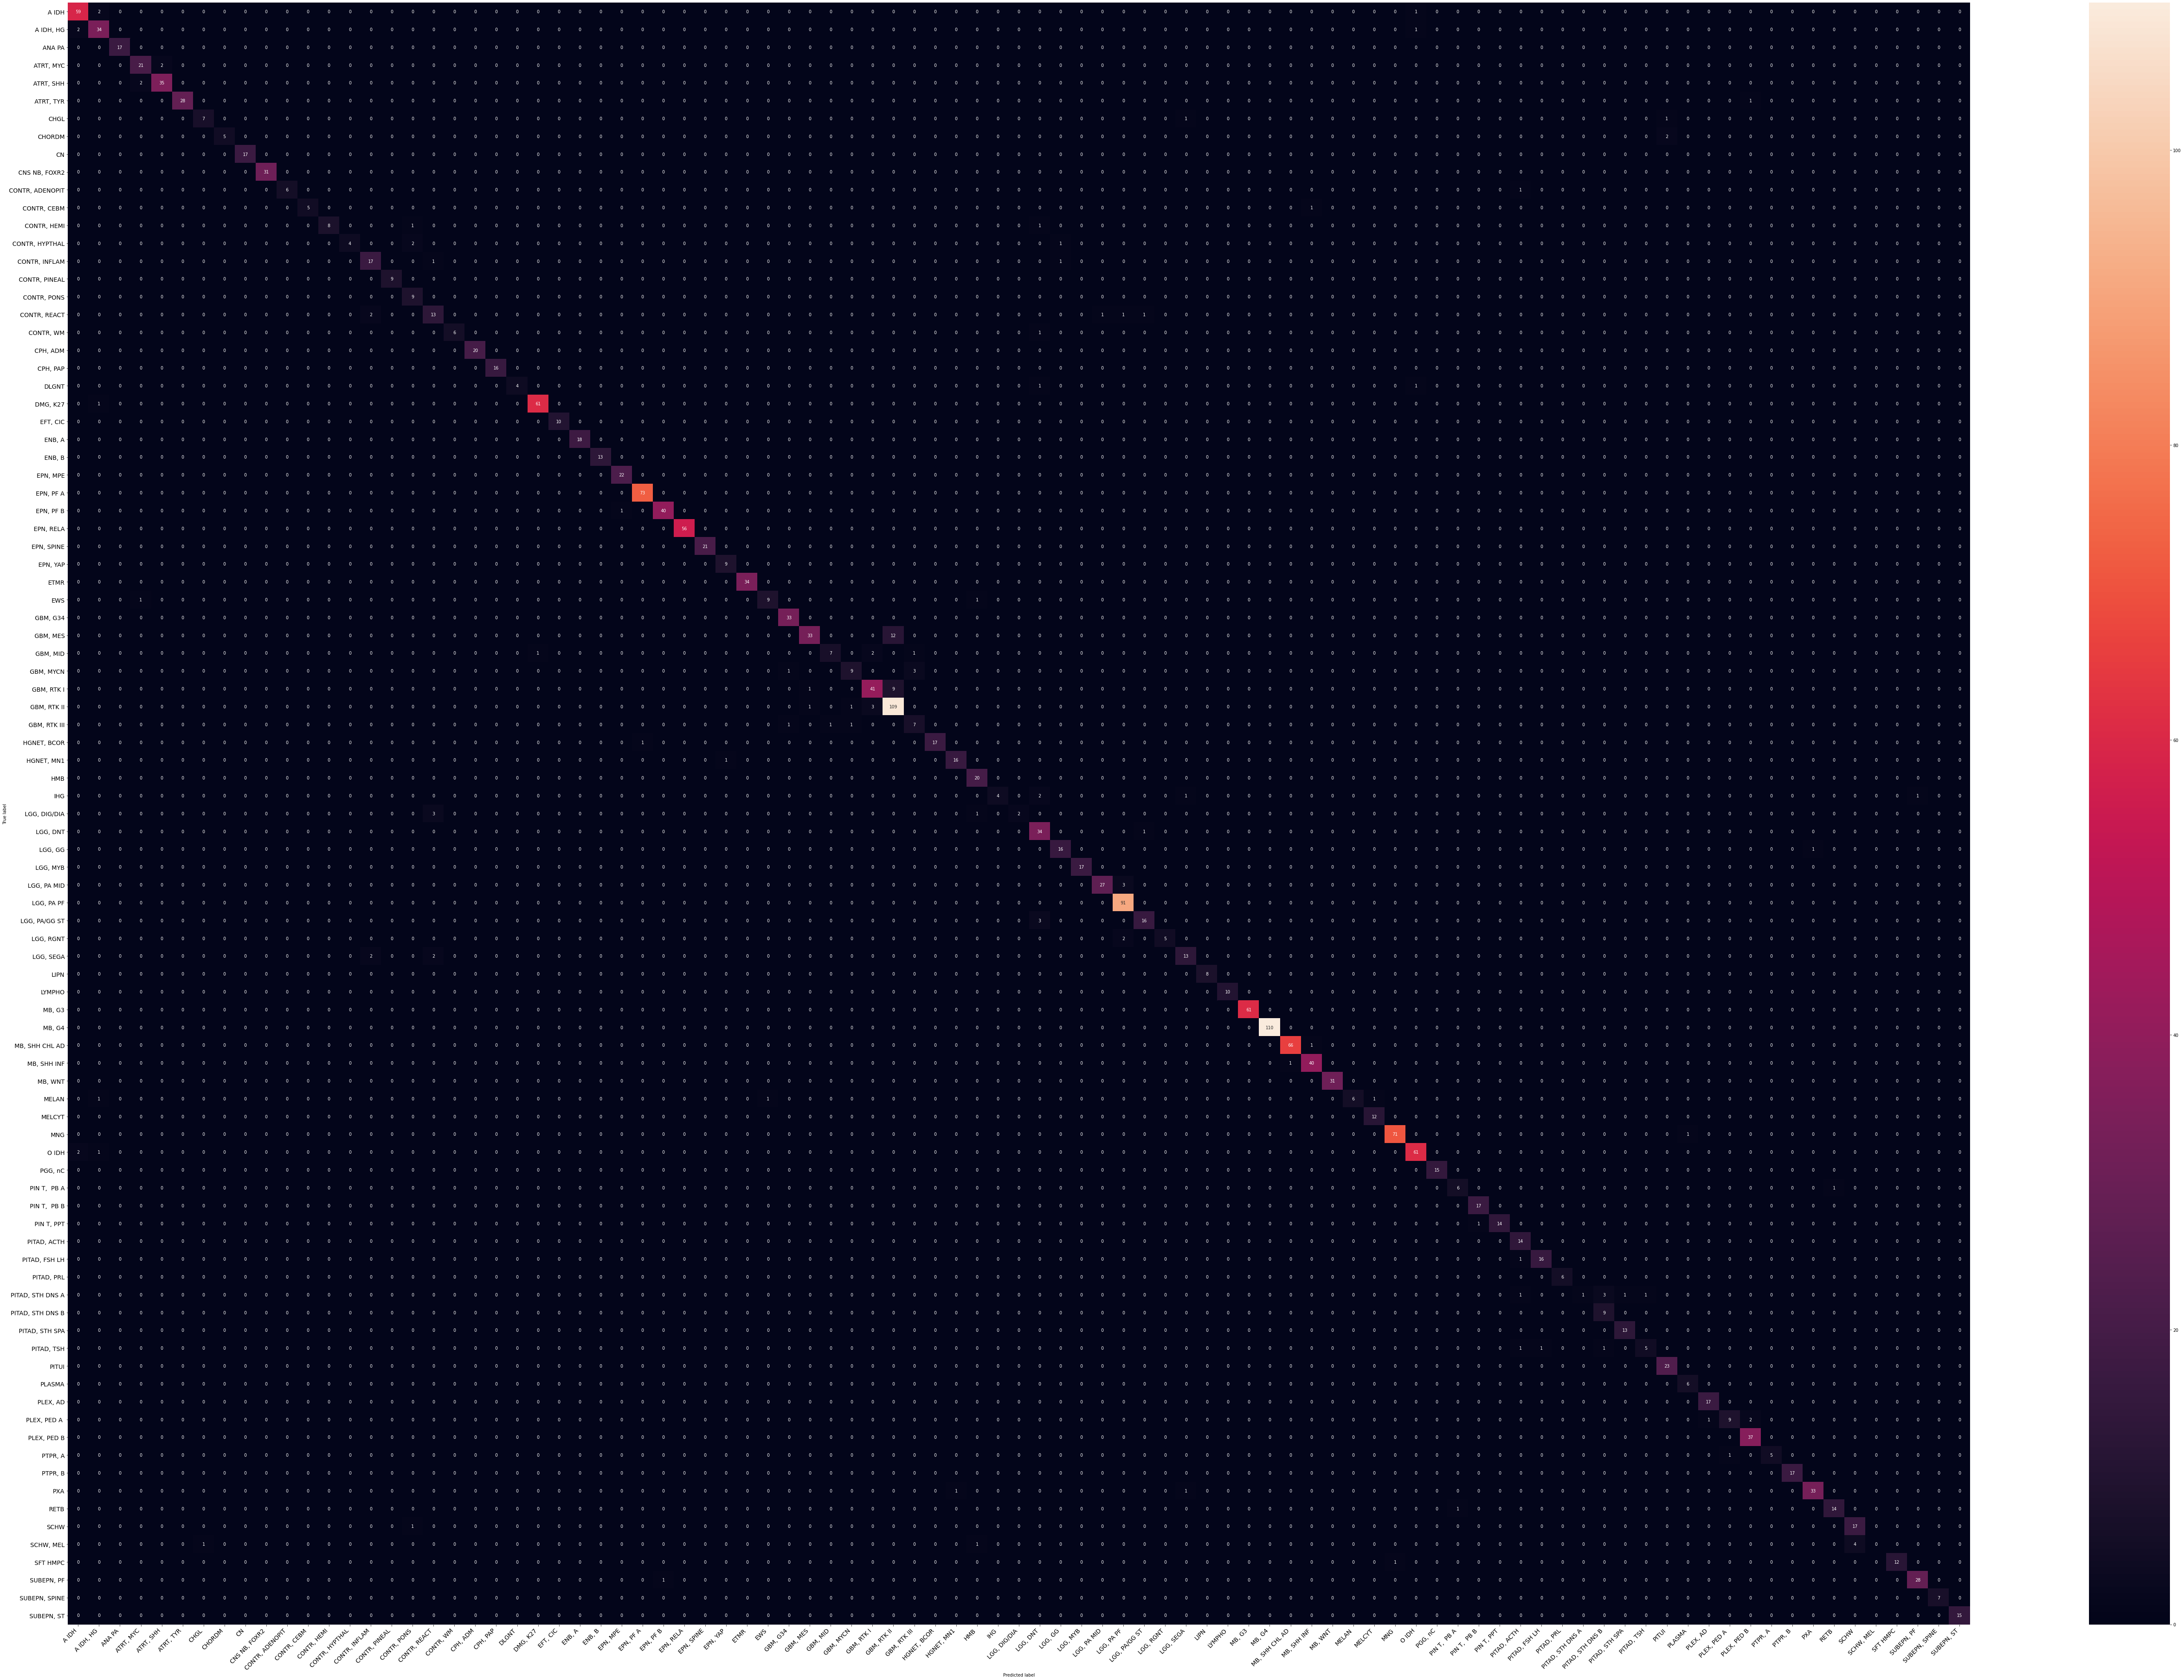

In [63]:
plot_confusion_matrix(cfs, label_codes.keys())